In [671]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder

In [672]:
df = pd.read_csv("Dataset/spam.csv",  encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [673]:
df.shape

(5572, 5)

#### 1. Data Cleaning

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [675]:
# Drop Last 3 Columns

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [676]:
df.sample(10)

,v1,v2
3419,spam,"As a valued customer, I am pleased to advise y..."
3627,ham,Meeting u is my work. . . Tel me when shall i ...
3836,ham,Early bird! Any purchases yet?
1014,ham,"Ya, told..she was asking wats matter?"
5100,ham,"Aight, call me once you're close"
3550,ham,I love you both too :-)
2348,ham,That seems unnecessarily affectionate
2188,spam,FREE camera phones with linerental from 4.49/m...
4981,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...
3852,ham,"Dont worry, 1 day very big lambu ji vl come..t..."


In [677]:
# Renaming Columns

df.rename(columns={
    "v1":"target",
    "v2":"text"
}, inplace=True)

df.sample(10)

,target,text
1457,spam,CLAIRE here am havin borin time & am now alone...
2103,ham,Its a site to simulate the test. It just gives...
381,ham,"Yeah sure, give me a couple minutes to track d..."
3052,ham,Pls send me the correct name da.
2338,ham,"Alright, see you in a bit"
1742,ham,\EY! CALM DOWNON THEACUSATIONS.. ITXT U COS IW...
1352,ham,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...
5010,spam,You have WON a guaranteed å£1000 cash or a å£2...
2974,ham,"Don't worry, * is easy once have ingredients!"
723,ham,Ya even those cookies have jelly on them


In [678]:
# label Encoding

encoder = LabelEncoder()

In [679]:
df['target'] = encoder.fit_transform(df['target'])

df.sample(10)

,target,text
188,0,Have you got Xmas radio times. If not i will g...
2155,0,What year. And how many miles.
4357,1,Our dating service has been asked 2 contact U ...
4904,1,Warner Village 83118 C Colin Farrell in SWAT t...
1934,0,Hope you are having a great day.
1766,1,SMS AUCTION You have won a Nokia 7250i. This i...
3373,0,Also andros ice etc etc
1991,0,No other Valentines huh? The proof is on your ...
2263,1,Not heard from U4 a while. Call 4 rude chat pr...
159,1,You are a winner U have been specially selecte...


In [680]:
# Checking Missing Values

df.isnull().sum()

target    0
text      0
dtype: int64

In [681]:
# Check for Duplicate Values

df.duplicated().sum()

403

In [682]:
# Remove Duplicates

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [683]:
df.shape

(5169, 2)

#### 2. EDA

In [684]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [685]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

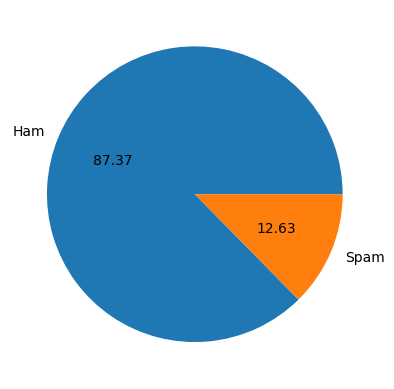

In [686]:
# Pie Chart

plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

Data is Imbalanced

In [687]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [688]:
# Fetching Number of Characters

df['num_characters'] = df['text'].apply(len)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\109741788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [689]:
# Fetching Number of Words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\3503966380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [690]:
# Fetching Number of Sentences

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\3925254500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [691]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
3233,0,Yup Ì_ not comin :-(,20,7,1
4480,0,No..its ful of song lyrics..,28,8,1
105,0,Thanks a lot for your wishes on my birthday. T...,95,19,2
2648,0,"Hi, can i please get a &lt;#&gt; dollar loan...",96,29,3
4680,0,Are you staying in town ?,25,6,1
4815,0,Anything is valuable in only 2 situations: Fir...,98,18,1
3311,0,I know you are serving. I mean what are you do...,54,14,2
1103,0,Aiyah sorry lor... I watch tv watch until i fo...,68,16,2
3689,0,What happen dear tell me,24,5,1
1149,0,Not a drop in the tank,22,6,1


In [692]:
# For HAM Messages

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [693]:
# For SPAM Messages

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

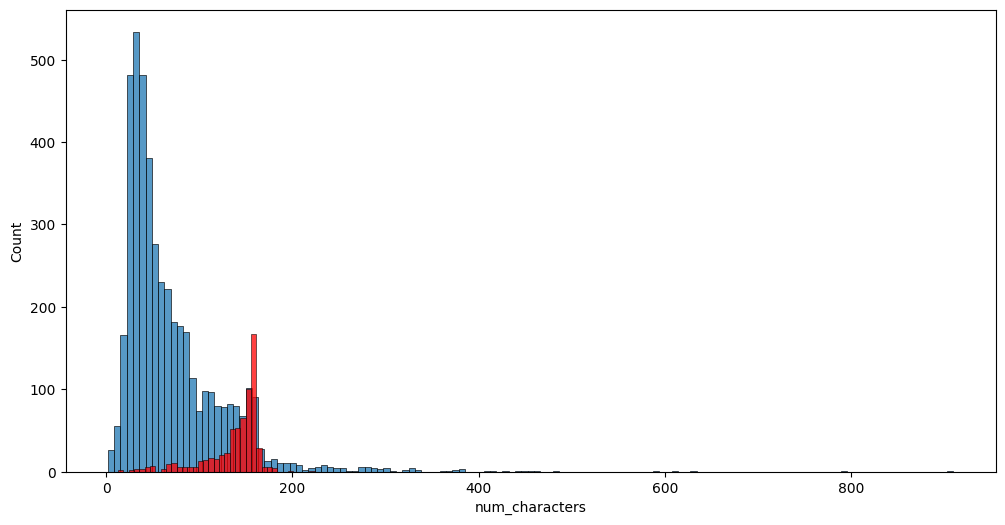

In [694]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

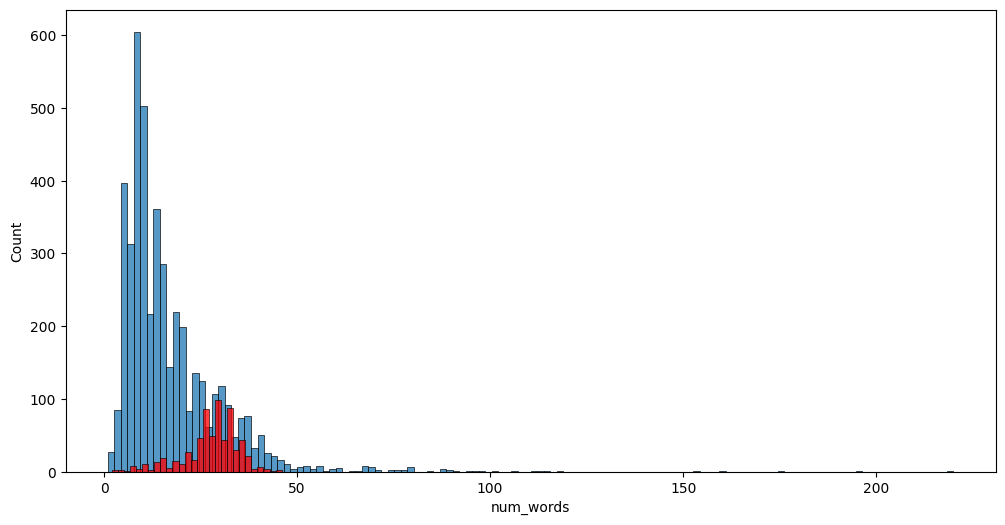

In [695]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

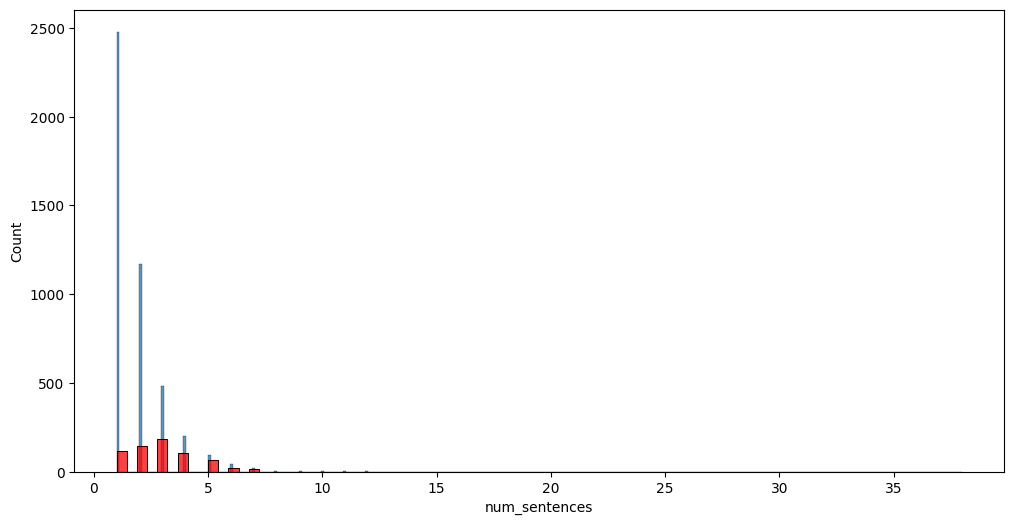

In [696]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

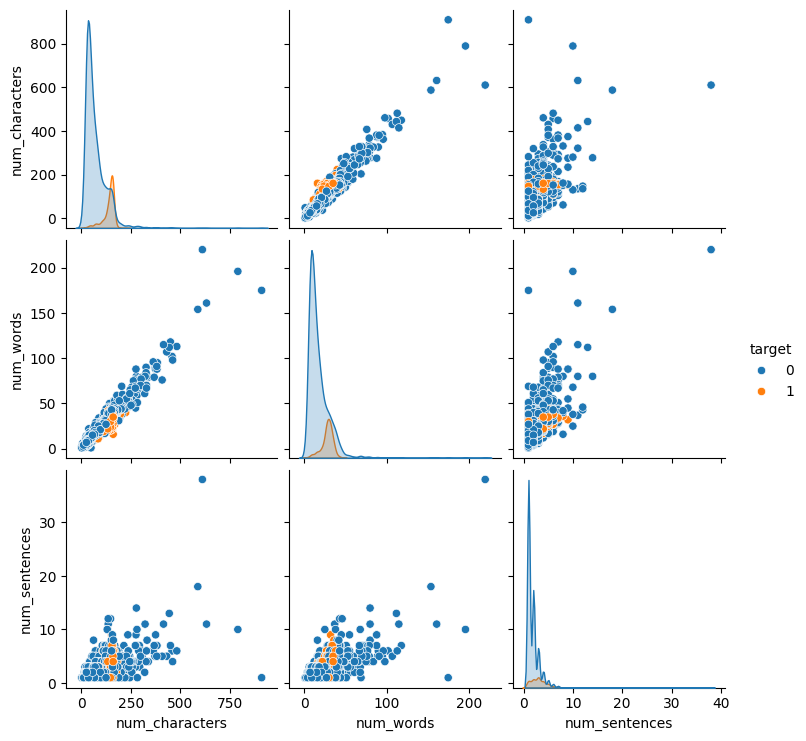

In [697]:
sns.pairplot(df, hue='target')
plt.show()

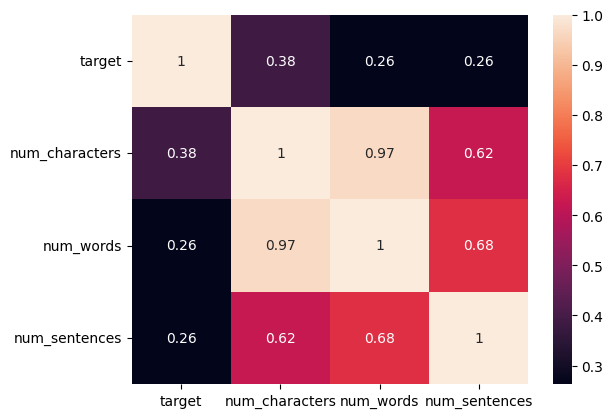

In [698]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

#### 3. Data Preprocessing

In [699]:
def transform_text(text):
    
    # Lower Case
    text = text.lower()
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Removing Stop Words and Punctuations
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # Stemming
    ps = PorterStemmer()
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) 
    
    
    return " ".join(y)

In [700]:
df['transformed_text'] = df["text"].apply(transform_text)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\1370377905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df["text"].apply(transform_text)


In [701]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [702]:
wc = WordCloud(width=1200, height=800, min_font_size=10, background_color='white')

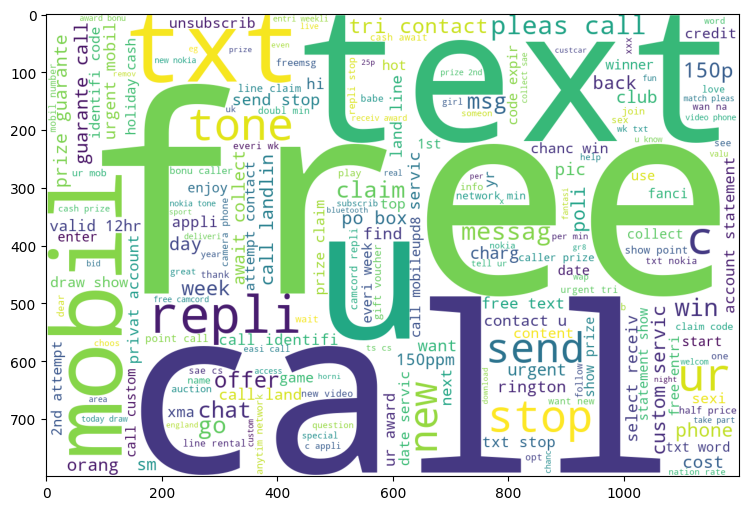

In [703]:
# WordCloud of Spam

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

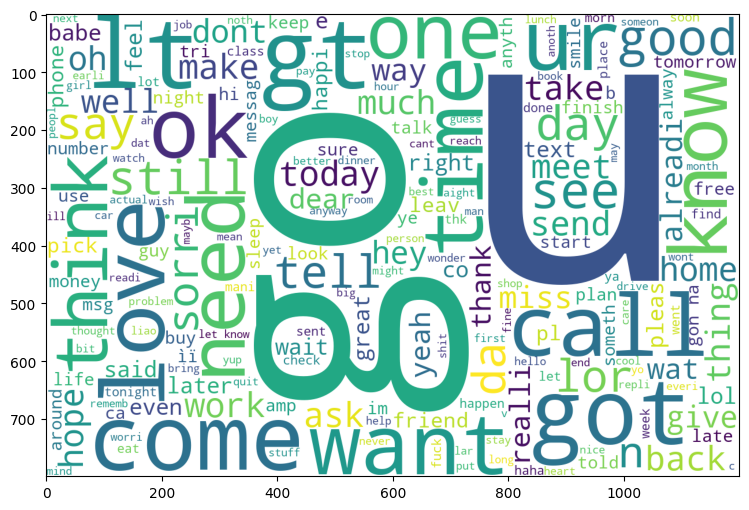

In [704]:
# WordCloud of Ham

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [705]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


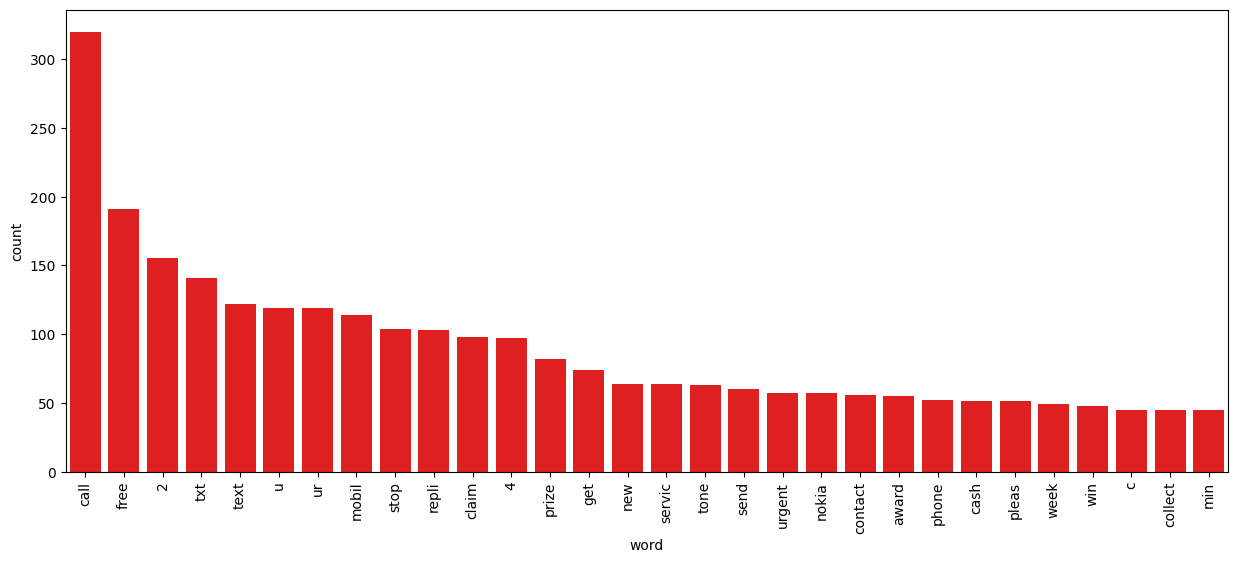

In [706]:
# Most Frequent Words for SPAM

spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Prepare data
df_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(15,6))
sns.barplot(data=df_freq, x='word', y='count', color='red')
plt.xticks(rotation=90)
plt.show()

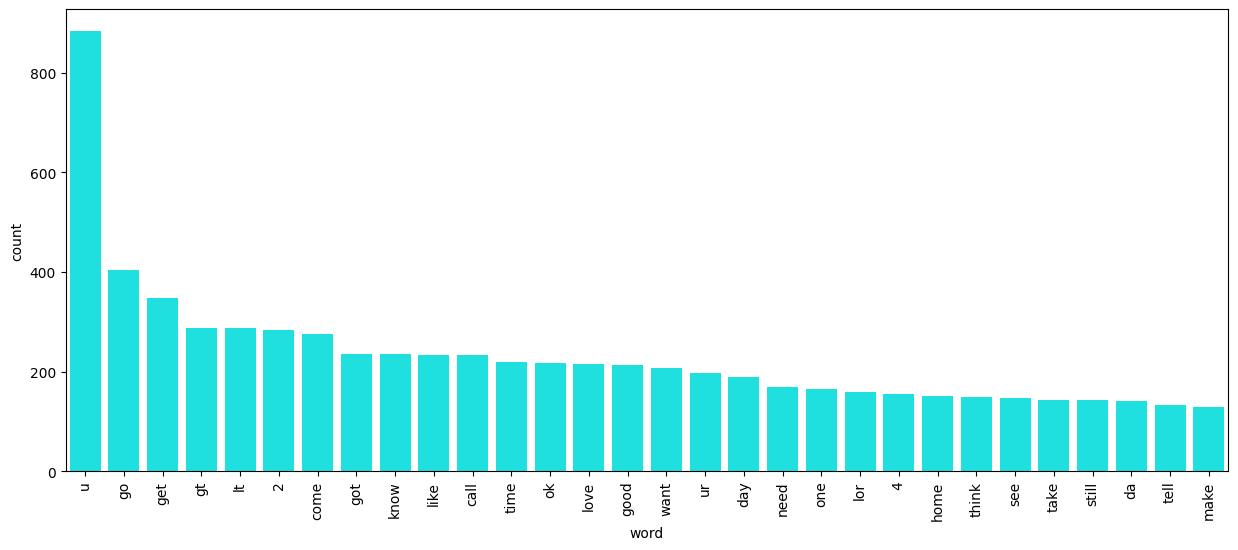

In [707]:
# Most Frequent Words for HAM

ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Prepare data
df_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(15,6))
sns.barplot(data=df_freq, x='word', y='count', color='cyan')
plt.xticks(rotation=90)
plt.show()

#### 4. Model Building

In [708]:
# Text Vectorization using Bag of Words

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [709]:
# X = cv.fit_transform(df['transformed_text']).toarray()

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [710]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [730]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [711]:
y = df['target'].values

In [712]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [713]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [714]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print("\tGaussian Naive Bayes\n")
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))
print("Precision Score: ", precision_score(y_test, y_pred1))

	Gaussian Naive Bayes

Accuracy Score:  0.8694390715667312
Confusion Matrix: 
 [[788 108]
 [ 27 111]]
Precision Score:  0.5068493150684932


In [715]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print("\tMultinomial Naive Bayes\n")
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))

	Multinomial Naive Bayes

Accuracy Score:  0.9709864603481625
Confusion Matrix: 
 [[896   0]
 [ 30 108]]
Precision Score:  1.0


In [716]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("\tBernoulli Naive Bayes\n")
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred3))
print("Precision Score: ", precision_score(y_test, y_pred3))

	Bernoulli Naive Bayes

Accuracy Score:  0.9835589941972921
Confusion Matrix: 
 [[895   1]
 [ 16 122]]
Precision Score:  0.991869918699187


`We will select tfidf as Vectorizer and Multinomial Naive Bayes as Model`

#### Checking more Machine Learning Models

In [717]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [718]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [719]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb,
}

In [720]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [721]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [722]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For  KN
Accuracy:  0.9052224371373307
Precision:  1.0
For  NB
Accuracy:  0.9709864603481625
Precision:  1.0
For  DT
Accuracy:  0.9323017408123792
Precision:  0.8333333333333334
For  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829
For  AdaBoost
Accuracy:  0.9245647969052224
Precision:  0.8488372093023255
For  BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For  xgb
Accuracy:  0.9671179883945842
Precision:  0.9482758620689655


In [723]:
performance_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores
}).sort_values('Precision', ascending=False)

In [724]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [725]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [726]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


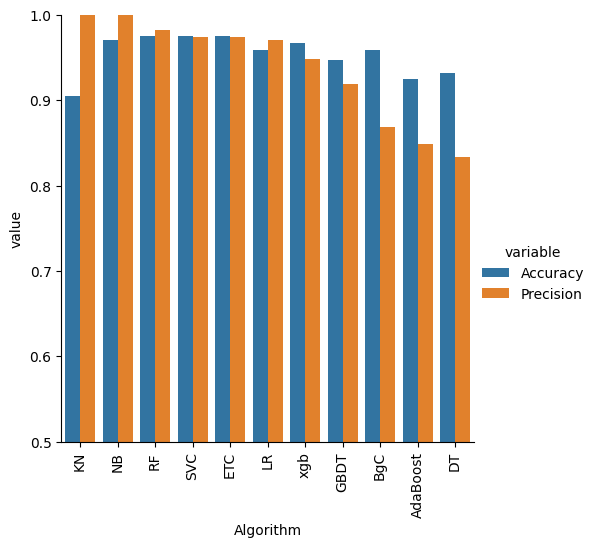

In [727]:
g = sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=5
)

# Access the axes
g.set(ylim=(0.5, 1.0))
g.set_xticklabels(rotation=90)

plt.show()


`Model Improvement`

In [728]:
# 1. Change the max_features parameter of TfIDf (Affective)

# 2. Use Scaling (Not Affective)

# 3. Using Features (Not Affective)

# 4. Voting Classifiers (Not Affective)

# 5. Stacking (Not Affective)


In [ ]:
temp_df = pd.DataFrame({
    'Algorithm':clfs.keys(),
    'Accuracy_Max_FT_3000':accuracy_scores,
    'Precision_Max_FT_3000':precision_scores,
}).sort_values('Precision_Max_FT_3000', ascending=False)

In [ ]:
temp_df = pd.DataFrame({
    'Algorithm':clfs.keys(),
    'Accuracy_Scaling':accuracy_scores,
    'Precision_Scaling':precision_scores,
}).sort_values('Precision_Scaling', ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({
    'Algorithm':clfs.keys(),
    'Accuracy_Num_Chars':accuracy_scores,
    'Precision_Num_Chars':precision_scores,
}).sort_values('Precision_Num_Chars', ascending=False)

In [ ]:
new_df_scaled.merge(temp_df, on='Algorithm')

In [ ]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('svm', svc),
    ('nb', mnb),
    ('et', etc)
], voting='soft')

voting.fit(X_train,y_train)

y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

In [ ]:
# Applying Stacking

from sklearn.ensemble import StackingClassifier

estimators = [
    ('svm', svc),
    ('nb', mnb),
    ('et', etc)
]
final_estimator = RandomForestClassifier()

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

#### Exporting Pickle File

In [729]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))